<a href="https://colab.research.google.com/github/DivinSphere/Reconhecedor-de-simbolos-simples-com-IA-Python/blob/main/Reconhecedor_simples_de_Simbolos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to Download the App to Draw images and Data with 600 Exemples of 0-9 simbols:

https://drive.google.com/file/d/1ERL8Sk5wRUKgoF8J6VE49sselW9tV0cu/view?usp=sharing

In [2]:
#@title **`Data Initializer`** { display-mode: "form" }

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from PIL import Image, ImageColor
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import tree
import random, json, os
import pandas as pd
import numpy  as np
import ast


if 'Train_X' not in globals() or 'Train_Y' not in globals():
  Train_X=[]
  Train_Y=[]

Seed = 0 #@param {type:"integer"}

if Seed==0:
  random.seed()
  Seed = int(random.random()*1000)


Model = LinearSVC(random_state=Seed) #@param ["LinearSVC(random_state=Seed)", "DecisionTreeClassifier(random_state=Seed)", "RandomForestClassifier(random_state=Seed)", "LogisticRegression(random_state=Seed)", "MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=Seed)", "KNeighborsClassifier(n_neighbors=10)", "SVC(kernel='linear',random_state=Seed)", "GaussianProcessClassifier(random_state=Seed)", "AdaBoostClassifier(n_estimators=100, random_state=Seed)", "GaussianNB()", "QuadraticDiscriminantAnalysis()"] {type:"raw"}
Name=type(Model).__name__



Clear_Data = "Keep Current Data" #@param ["Keep Current Data", "Clear Current Data"]


if Clear_Data=="Clear Current Data":
  Train_X=[]
  Train_Y=[]

del Clear_Data


In [35]:
#@title **`Backup Data`**

Action = "Import Data to Memory \u003C-" #@param ["Import Data to Memory \u003C-", "Export Data to Path ->"]

Data_Path = "/content/drive/MyDrive/COLLAB/DATA.json" #@param {type:"string"}
Result_Path = "/content/drive/MyDrive/COLLAB/RESULT.json" #@param {type:"string"}

if Action=="Export Data to Path ->":

  if len(set(Train_Y))>0 and len(set(Train_Y))>0:

    #CREATE BACKUP OF REGISTERED DATA
    with open(Data_Path, 'w') as json_file:
        json.dump(Train_X, json_file, indent=4)

    #CREATE RESULTS FROM REGISTERED DATA
    with open(Result_Path, 'w') as json_file:
        json.dump(Train_Y, json_file, indent=4)

    del json_file

    print("Data Exported!")
  else:
    print("Need more data to export!")

if Action=="Import Data to Memory <-":

  #LOAD BACKUP OF REGISTERED DATA
  with open(Data_Path, 'r') as json_file:
      Train_X = json.load(json_file)

  #LOAD RESULTS OF REGISTERED DATA
  with open(Result_Path, 'r') as json_file:
      Train_Y = json.load(json_file)

  #IF THERE IS MORE THAN 1 CLASS, TRAIN MODEL
  if len(set(Train_Y))>1:
    Model.fit(Train_X,Train_Y)

  del json_file

  print("Data Imported!\n")

  print(pd.DataFrame(Train_Y, columns=['Simb/Count']).groupby(['Simb/Count'])['Simb/Count'].count())

del Action,Data_Path,Result_Path

Data Imported!

Simb/Count
0    60
1    60
2    60
3    60
4    60
5    60
6    60
7    60
8    60
9    60
Name: Simb/Count, dtype: int64


In [ ]:
#@title **`Draw Data`**



IMG=Image.new('1',size=(20,20),color='white')

Data_Number = 222 #@param {type:"integer"}

Size = 151 #@param {type:"slider", min:100, max:500, step:1}


for j in range(20):
  for i in range(20):
    if Train_X[Data_Number][j*20+i]==1:
      IMG.putpixel((i,j), ImageColor.getcolor('black', '1')) 


print("The Symbol is: ",Train_Y[Data_Number])

IMG = IMG.resize((Size,Size), Image.ANTIALIAS)

del Data_Number,i,j,Size

IMG



In [36]:
#@title **`Insert Data`**
 
Data = "0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0" #@param {type:"string"}
Result = "7" #@param {type:"string"}

Train_X.append(list(map(int, Data.split(","))))
Train_Y.append(Result)

print(pd.DataFrame(Train_Y, columns=['Simb/Count']).groupby(['Simb/Count'])['Simb/Count'].count())

del Data,Result

Simb/Count
0    60
1    60
2    60
3    60
4    60
5    60
6    60
7    61
8    60
9    60
Name: Simb/Count, dtype: int64


In [ ]:
#@title **`Create View`**

# CREATE A TXT FILE FOR VIEWING DATA ONLY

if len(set(Train_Y))>0 and len(set(Train_Y))>0:
  File_Name = "Image.txt" #@param {type:"string"}
  with open(File_Name, "w") as f:
    for index, item in enumerate(Train_X):
      for item2 in item:
        if item2==1:
          f.write("O")
        else:
          f.write("_")
      f.write(str(Train_Y[index]))
      f.write("\n")

  del f,item,item2,index,File_Name

In [ ]:
#@title **`Identify Image`** { display-mode: "form" }
 
if len(set(Train_Y))>1:
  Model.fit(Train_X,Train_Y)

  Data = "0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0" #@param {type:"string"}

  print("The Symbol found is:",Model.predict([list(map(int, Data.split(",")))])[0])

  del Data

The Symbol found is: 3


In [ ]:
#@title **`Test Model`** { display-mode: "form" }

Size_Test = 0.20 #@param {type:"number"}

X_train, X_test, y_train, y_test = train_test_split(Train_X, Train_Y, test_size=Size_Test, random_state=Seed)

Model.fit(X_train,y_train)

print("Model:",Name)

print("\nTrain Count:",len(X_train))
print("\nTest Count:",len(X_test))


print("\nScore:",Model.score(X_test,y_test))


matriz=confusion_matrix(y_test, Model.predict(X_test))

hits=sum(matriz[i][i] for i in range(len(matriz)))

mistakes=len(X_test)-hits

print("\nHits:",hits)

print("\nMistakes:",mistakes)


print("\nMatrix:\n",matriz)


del X_train,X_test,y_train,y_test,Size_Test,matriz,hits,mistakes,




Model: LinearSVC

Train Count: 480

Test Count: 120

Score: 0.875

Hits: 105

Mistakes: 15

Matrix:
 [[ 6  0  0  0  1  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  1]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  1  0  0]
 [ 0  0  0  0 11  0  1  0  0  0]
 [ 0  1  0  0  0 13  0  0  0  0]
 [ 0  2  0  0  0  0 11  0  1  0]
 [ 0  0  0  0  1  0  0  8  0  0]
 [ 0  0  0  0  0  0  1  0  9  0]
 [ 1  0  0  1  0  2  0  0  1  9]]


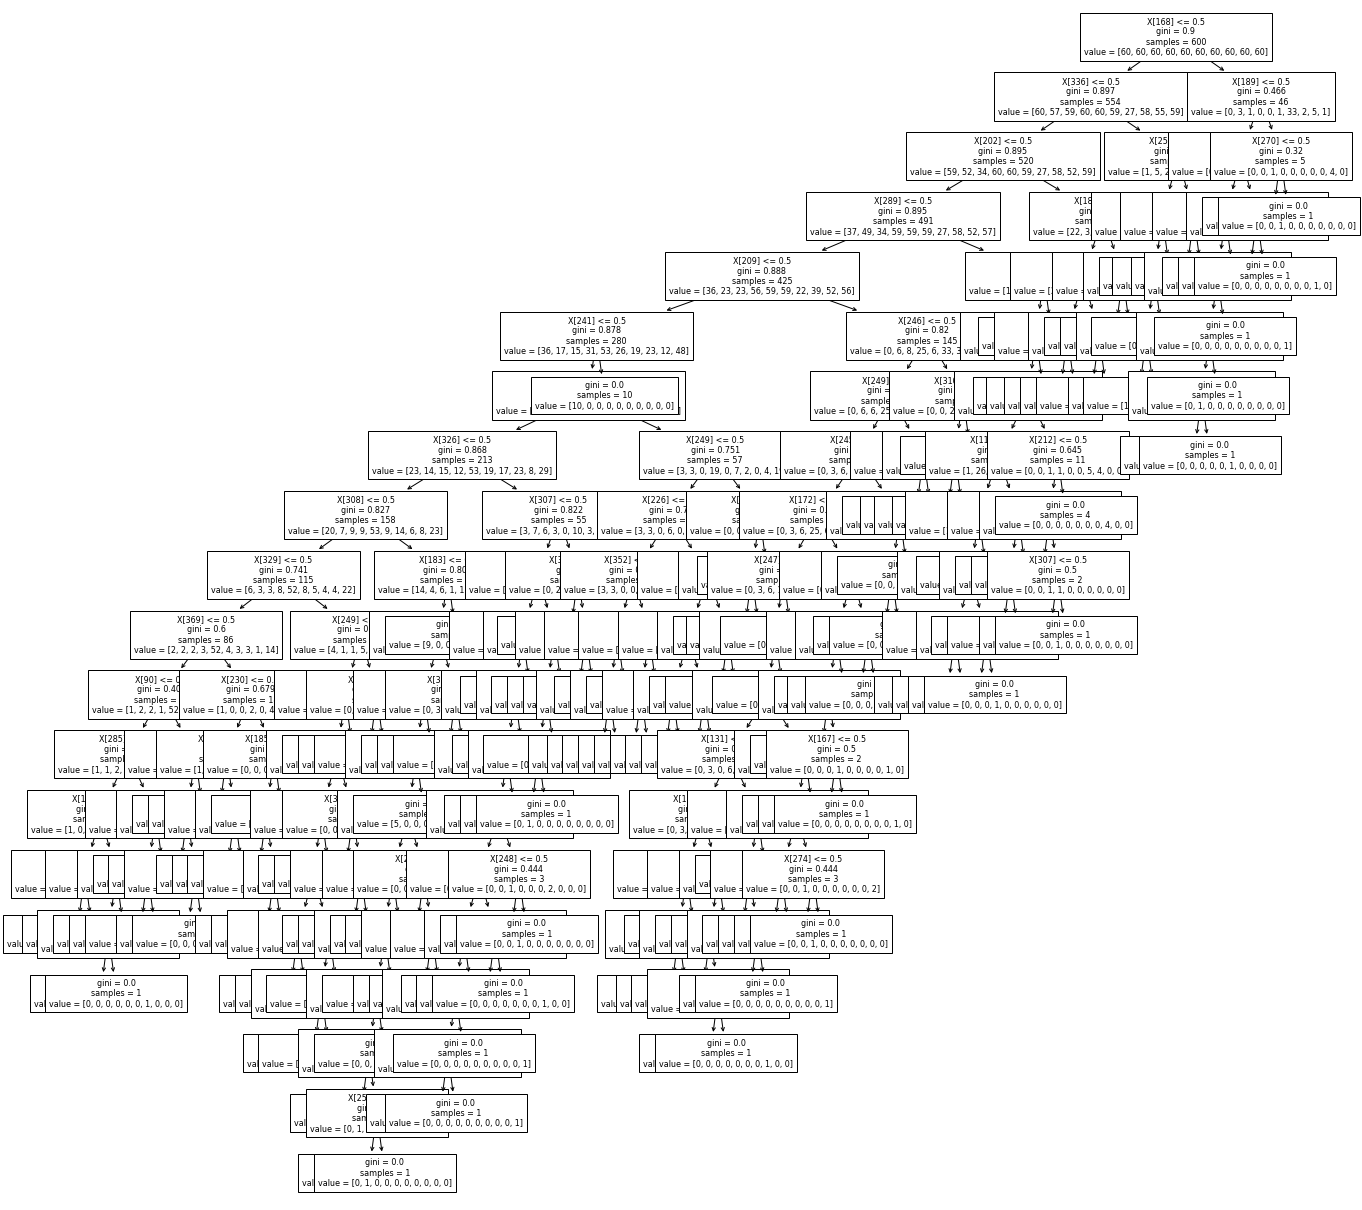

In [ ]:
#@title **`Plot DecisionTreeClassifier Only`** { display-mode: "form" }


if Name=='DecisionTreeClassifier':

  Model.fit(Train_X,Train_Y)

  plt.figure(figsize=(22,22))  # set plot size (denoted in inches)
  tree.plot_tree(Model, fontsize=8)
  plt.show()